In [1]:
import random as rndd
import math 
import time
import numpy as np
import time


In [2]:
Im =  np.array([ 74.26180537,  81.79133315,  89.73916166,  97.68700931,
              106.47145839, 112.32774501, 117.3474302 , 123.62203669,
              128.64172188, 134.07972693, 139.09941213, 144.11909732,
              150.3937038 , 157.08661101, 163.36121749, 170.47244456,
              176.32873119, 182.60333767, 188.87794416, 195.15255065,
              202.68207843, 210.62992608, 217.32285244, 224.85238022,
              231.12698671, 236.56495347, 243.25787982, 251.62400904,
              260.40845812, 270.86614837, 278.81399602, 286.76180537,
              293.45473172, 300.56593964, 308.51378729, 316.87991651,
              327.33760676, 334.44881468, 340.72342116, 346.99802765])

Vm = np.array([0.83908684, 0.83240535, 0.82238308, 0.81403116, 0.80651446,
            0.79899776, 0.79231627, 0.78563474, 0.77895322, 0.77394208,
            0.76893095, 0.76308463, 0.75473276, 0.74805123, 0.74053453,
            0.73301782, 0.72550112, 0.71881959, 0.71213811, 0.70378619,
            0.69459913, 0.68708243, 0.6804009 , 0.67121381, 0.66453232,
            0.65701562, 0.6486637 , 0.64031182, 0.62945438, 0.61776171,
            0.61024501, 0.60189313, 0.59521161, 0.58685973, 0.57767263,
            0.57015593, 0.56013366, 0.55094657, 0.54510025, 0.53841873])


In [3]:
def Fitness(x):
 N=1
 F= 96485.33
 R =  8.314
 Ph = 3
 Po = 3
 Ph2o = 3
 T=1073
 Voc=np.zeros(len(Im),dtype=float)
 Vact = np.zeros(len(Im),dtype=float)
 Vconc  = np.zeros(len(Im),dtype=float)
 Vohmic = np.zeros(len(Im),dtype=float)
 Vcell = np.zeros(len(Im),dtype=float)
 SE = np.zeros(len(Im),dtype=float)
 SSE =0
 for i in range (len(Im)): 
    Voc[i] = x[0]+ (R*T/(4*F))*math.log((Ph*((Po)**0.5))/Ph2o)
    Vact[i] = x[1]*(math.asinh(Im[i]/(2*x[2])) + math.asinh(Im[i]/(2*(x[3]))))
    Vconc[i] = x[4]*(math.log(1-(Im[i]/x[5])))
    Vohmic[i] = Im[i]*x[6]
    Vcell[i] = N*(Voc[i] - Vact[i] - Vconc[i] - Vohmic[i])
    SE[i] = ((Vcell[i] - Vm[i])**2)/40
    SSE = SSE + SE[i] 
 fitnessval = SSE
 return fitnessval

In [4]:
from mealpy import FloatVar, DE
from mealpy import GWO

In [5]:
problem_dict = {
    "bounds": FloatVar(lb= [0,0,0,0,0,357,0], ub=[1.2,1,100,100,1,1000,1], name="delta"),
    "minmax": "min",
    "obj_func": Fitness
}


DE: BASE

In [6]:
Optimizer_performance = {}

for i in range(0,20):
    timerStart = time.time()
    model_base_de = DE.OriginalDE(epoch=100, pop_size=30, miu_f = 0.5, miu_cr = 0.5, pt = 0.1, ap = 0.1)
    g_best_base_de = model_base_de.solve(problem_dict)
    timerEnd = time.time()
    executionTime = timerEnd - timerStart
    
    SSE = Fitness(g_best_base_de.solution)
    MSE = SSE/len(Im)
    
    print('Base DE: SSE Score: ', SSE)
    print("Fitness: ", g_best_base_de.target.fitness)
    
    Optimizer_performance[str(i+1)] = {}
    Optimizer_performance[str(i+1)]['Solution'] = g_best_base_de
    Optimizer_performance[str(i+1)]['SSE'] = SSE
    Optimizer_performance[str(i+1)]['MSE'] = MSE
    Optimizer_performance[str(i+1)]['Execution_time'] = executionTime

2024/03/06 11:56:47 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: Solving single objective optimization problem.
C:\Users\saxen\AppData\Local\Temp\ipykernel_14536\2016412673.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  Vact[i] = x[1]*(math.asinh(Im[i]/(2*x[2])) + math.asinh(Im[i]/(2*(x[3]))))
2024/03/06 11:56:47 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 1, Current best: 95.02455784464668, Global best: 95.02455784464668, Runtime: 0.02071 seconds
2024/03/06 11:56:47 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 2, Current best: 4.9368958457506125, Global best: 4.9368958457506125, Runtime: 0.00983 seconds
2024/03/06 11:56:47 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 3, Current best: 4.9368958457506125, Global best: 4.9368958457506125, Runtime: 0.00990 seconds
2024/03/06 11:56:47 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 4, Current best: 1.77

Base DE: SSE Score:  0.12127972337528103
Fitness:  0.12127972337528103


2024/03/06 11:56:49 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.0010212964828692714, Global best: 0.0010212964828692714, Runtime: 0.00957 seconds
2024/03/06 11:56:49 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.000852308030727745, Global best: 0.000852308030727745, Runtime: 0.01128 seconds
2024/03/06 11:56:49 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.000599561043639221, Global best: 0.000599561043639221, Runtime: 0.01006 seconds
2024/03/06 11:56:49 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.000599561043639221, Global best: 0.000599561043639221, Runtime: 0.00943 seconds
2024/03/06 11:56:49 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.000599561043639221, Global best: 0.000599561043639221, Runtime: 0.01036 seconds
2024/03/06 11:56:49 AM, INFO, mea

Base DE: SSE Score:  0.00024061500827627193
Fitness:  0.00024061500827627193


2024/03/06 11:56:50 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.09882745736589824, Global best: 0.09882745736589824, Runtime: 0.00973 seconds
2024/03/06 11:56:50 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.05670991774798052, Global best: 0.05670991774798052, Runtime: 0.01127 seconds
2024/03/06 11:56:50 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.0468809509475502, Global best: 0.0468809509475502, Runtime: 0.01118 seconds
2024/03/06 11:56:50 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.009561375587266899, Global best: 0.009561375587266899, Runtime: 0.00958 seconds
2024/03/06 11:56:50 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 20, Current best: 0.009561375587266899, Global best: 0.009561375587266899, Runtime: 0.01005 seconds
2024/03/06 11:56:50 AM, INFO, mealpy.evolut

Base DE: SSE Score:  0.00028097315726807184
Fitness:  0.00028097315726807184


2024/03/06 11:56:51 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 12, Current best: 0.00045902540942768685, Global best: 0.00045902540942768685, Runtime: 0.01343 seconds
2024/03/06 11:56:51 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 0.00045902540942768685, Global best: 0.00045902540942768685, Runtime: 0.01246 seconds
2024/03/06 11:56:51 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.00045092529061651373, Global best: 0.00045092529061651373, Runtime: 0.01344 seconds
2024/03/06 11:56:51 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.0003498918258052417, Global best: 0.0003498918258052417, Runtime: 0.03016 seconds
2024/03/06 11:56:51 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.00031687211372275934, Global best: 0.00031687211372275934, Runtime: 0.01534 seconds
2024/03/06 11:56:

Base DE: SSE Score:  0.0003027325292282715
Fitness:  0.0003027325292282715


2024/03/06 11:56:53 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 10, Current best: 0.028206503358621536, Global best: 0.028206503358621536, Runtime: 0.03147 seconds
2024/03/06 11:56:53 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 11, Current best: 0.028206503358621536, Global best: 0.028206503358621536, Runtime: 0.02229 seconds
2024/03/06 11:56:53 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 12, Current best: 0.024822656939268696, Global best: 0.024822656939268696, Runtime: 0.02641 seconds
2024/03/06 11:56:53 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 0.024822656939268696, Global best: 0.024822656939268696, Runtime: 0.01447 seconds
2024/03/06 11:56:53 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.024421594809169455, Global best: 0.024421594809169455, Runtime: 0.01090 seconds
2024/03/06 11:56:53 AM, INFO, mealp

Base DE: SSE Score:  0.019966905345171836
Fitness:  0.019966905345171836


2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 41.13218553100196, Global best: 41.13218553100196, Runtime: 0.01170 seconds
2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 39.69743488887354, Global best: 39.69743488887354, Runtime: 0.01114 seconds
2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 39.56629895066021, Global best: 39.56629895066021, Runtime: 0.01203 seconds
2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 39.44185696872298, Global best: 39.44185696872298, Runtime: 0.01065 seconds
2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 39.44185696872298, Global best: 39.44185696872298, Runtime: 0.01287 seconds
2024/03/06 11:56:54 AM, INFO, mealpy.evolutionary_based.DE.Origin

Base DE: SSE Score:  38.073697337877036
Fitness:  38.073697337877036


2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 12, Current best: 91.46671407586186, Global best: 91.46671407586186, Runtime: 0.01302 seconds
2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 90.93901964093347, Global best: 90.93901964093347, Runtime: 0.01240 seconds
2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 89.0814025535218, Global best: 89.0814025535218, Runtime: 0.01524 seconds
2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 89.01471963530511, Global best: 89.01471963530511, Runtime: 0.00953 seconds
2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 88.85294025551843, Global best: 88.85294025551843, Runtime: 0.01211 seconds
2024/03/06 11:56:55 AM, INFO, mealpy.evolutionary_based.DE.Original

Base DE: SSE Score:  85.95092586241145
Fitness:  85.95092586241145


2024/03/06 11:56:57 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 12, Current best: 0.004964054113977603, Global best: 0.004964054113977603, Runtime: 0.01536 seconds
2024/03/06 11:56:57 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 0.002891885441061766, Global best: 0.002891885441061766, Runtime: 0.01084 seconds
2024/03/06 11:56:57 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.002457023267223475, Global best: 0.002457023267223475, Runtime: 0.00975 seconds
2024/03/06 11:56:57 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.002457023267223475, Global best: 0.002457023267223475, Runtime: 0.00941 seconds
2024/03/06 11:56:57 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.0017202412946663581, Global best: 0.0017202412946663581, Runtime: 0.00981 seconds
2024/03/06 11:56:57 AM, INFO, mea

Base DE: SSE Score:  0.0008850729541697242
Fitness:  0.0008850729541697242


2024/03/06 11:56:58 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.00037127258653770737, Global best: 0.00037127258653770737, Runtime: 0.01322 seconds
2024/03/06 11:56:58 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.0003593212338436301, Global best: 0.0003593212338436301, Runtime: 0.01081 seconds
2024/03/06 11:56:58 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.00034277526021283915, Global best: 0.00034277526021283915, Runtime: 0.01486 seconds
2024/03/06 11:56:58 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.00034277526021283915, Global best: 0.00034277526021283915, Runtime: 0.01729 seconds
2024/03/06 11:56:58 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.00033514558970047033, Global best: 0.00033514558970047033, Runtime: 0.01605 seconds
2024/03/06 11:56:

Base DE: SSE Score:  0.0002859753687433359
Fitness:  0.0002859753687433359


2024/03/06 11:56:59 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.012683655708998562, Global best: 0.012683655708998562, Runtime: 0.01076 seconds
2024/03/06 11:56:59 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.012683655708998562, Global best: 0.012683655708998562, Runtime: 0.00907 seconds
2024/03/06 11:56:59 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.012661291713821295, Global best: 0.012661291713821295, Runtime: 0.00865 seconds
2024/03/06 11:56:59 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.012423158881841975, Global best: 0.012423158881841975, Runtime: 0.00976 seconds
2024/03/06 11:56:59 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.012423158881841975, Global best: 0.012423158881841975, Runtime: 0.01033 seconds
2024/03/06 11:56:59 AM, INFO, mealp

Base DE: SSE Score:  0.011935422589414407
Fitness:  0.011935422589414407


2024/03/06 11:57:01 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.0002486355528001681, Global best: 0.0002486355528001681, Runtime: 0.01022 seconds
2024/03/06 11:57:01 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.0002486355528001681, Global best: 0.0002486355528001681, Runtime: 0.00969 seconds
2024/03/06 11:57:01 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.00024400081230983254, Global best: 0.00024400081230983254, Runtime: 0.01526 seconds
2024/03/06 11:57:01 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.00023705796935233182, Global best: 0.00023705796935233182, Runtime: 0.00969 seconds
2024/03/06 11:57:01 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.00021602803006270693, Global best: 0.00021602803006270693, Runtime: 0.00791 seconds
2024/03/06 11:57:01

Base DE: SSE Score:  0.00017421063663938002
Fitness:  0.00017421063663938002


2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 18.10151384025666, Global best: 18.10151384025666, Runtime: 0.01211 seconds
2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 18.10151384025666, Global best: 18.10151384025666, Runtime: 0.00849 seconds
2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 17.537167736330428, Global best: 17.537167736330428, Runtime: 0.01052 seconds
2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 17.39153974679919, Global best: 17.39153974679919, Runtime: 0.00834 seconds
2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 16.32945636381779, Global best: 16.32945636381779, Runtime: 0.01677 seconds
2024/03/06 11:57:02 AM, INFO, mealpy.evolutionary_based.DE.Orig

Base DE: SSE Score:  14.363476948775364
Fitness:  14.363476948775364


2024/03/06 11:57:03 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.027440377282828967, Global best: 0.027440377282828967, Runtime: 0.01010 seconds
2024/03/06 11:57:03 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.02702029370315643, Global best: 0.02702029370315643, Runtime: 0.01765 seconds
2024/03/06 11:57:03 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.026580693813963926, Global best: 0.026580693813963926, Runtime: 0.00898 seconds
2024/03/06 11:57:03 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.02566220352125751, Global best: 0.02566220352125751, Runtime: 0.01320 seconds
2024/03/06 11:57:03 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.02566220352125751, Global best: 0.02566220352125751, Runtime: 0.00987 seconds
2024/03/06 11:57:03 AM, INFO, mealpy.evol

Base DE: SSE Score:  0.022488558136602322
Fitness:  0.022488558136602322


2024/03/06 11:57:05 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.0004891291056619622, Global best: 0.0004891291056619622, Runtime: 0.01431 seconds
2024/03/06 11:57:05 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.00029195250000067205, Global best: 0.00029195250000067205, Runtime: 0.01833 seconds
2024/03/06 11:57:05 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.00029195250000067205, Global best: 0.00029195250000067205, Runtime: 0.00928 seconds
2024/03/06 11:57:05 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.0002483700769421932, Global best: 0.0002483700769421932, Runtime: 0.00954 seconds
2024/03/06 11:57:05 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.00024241807402199022, Global best: 0.00024241807402199022, Runtime: 0.00839 seconds
2024/03/06 11:57:05

Base DE: SSE Score:  0.00020476834559894644
Fitness:  0.00020476834559894644


2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.2729451296514322, Global best: 0.2729451296514322, Runtime: 0.01319 seconds
2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.2648211923461725, Global best: 0.2648211923461725, Runtime: 0.01152 seconds
2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.2583884025162154, Global best: 0.2583884025162154, Runtime: 0.01356 seconds
2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.2583884025162154, Global best: 0.2583884025162154, Runtime: 0.01362 seconds
2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.2583884025162154, Global best: 0.2583884025162154, Runtime: 0.01437 seconds
2024/03/06 11:57:06 AM, INFO, mealpy.evolutionary_based

Base DE: SSE Score:  0.2434392055153688
Fitness:  0.2434392055153688


2024/03/06 11:57:07 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.001332281659465938, Global best: 0.001332281659465938, Runtime: 0.01023 seconds
2024/03/06 11:57:07 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.0010955861382544708, Global best: 0.0010955861382544708, Runtime: 0.01157 seconds
2024/03/06 11:57:07 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.0010955861382544708, Global best: 0.0010955861382544708, Runtime: 0.01111 seconds
2024/03/06 11:57:07 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.0010184318164444608, Global best: 0.0010184318164444608, Runtime: 0.01171 seconds
2024/03/06 11:57:07 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.0010184318164444608, Global best: 0.0010184318164444608, Runtime: 0.00924 seconds
2024/03/06 11:57:07 AM, INF

Base DE: SSE Score:  0.0009532304004233525
Fitness:  0.0009532304004233525


2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 57.92166622727562, Global best: 57.92166622727562, Runtime: 0.01146 seconds
2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 56.81029231707877, Global best: 56.81029231707877, Runtime: 0.01672 seconds
2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 56.81029231707877, Global best: 56.81029231707877, Runtime: 0.01310 seconds
2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 56.81029231707877, Global best: 56.81029231707877, Runtime: 0.01097 seconds
2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 20, Current best: 56.81029231707877, Global best: 56.81029231707877, Runtime: 0.00934 seconds
2024/03/06 11:57:08 AM, INFO, mealpy.evolutionary_based.DE.Origin

Base DE: SSE Score:  56.13593432101384
Fitness:  56.13593432101384


2024/03/06 11:57:10 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 13, Current best: 0.00021839856872822187, Global best: 0.00021839856872822187, Runtime: 0.01861 seconds
2024/03/06 11:57:10 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 14, Current best: 0.00021313056394272605, Global best: 0.00021313056394272605, Runtime: 0.00958 seconds
2024/03/06 11:57:10 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.00020232708510702617, Global best: 0.00020232708510702617, Runtime: 0.01013 seconds
2024/03/06 11:57:10 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.00020232708510702617, Global best: 0.00020232708510702617, Runtime: 0.00953 seconds
2024/03/06 11:57:10 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.00019437738746505039, Global best: 0.00019437738746505039, Runtime: 0.01097 seconds
2024/03/06 11:5

Base DE: SSE Score:  0.00017513636504485787
Fitness:  0.00017513636504485787


2024/03/06 11:57:11 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.0007083652845219248, Global best: 0.0007083652845219248, Runtime: 0.00907 seconds
2024/03/06 11:57:11 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.0007083652845219248, Global best: 0.0007083652845219248, Runtime: 0.01288 seconds
2024/03/06 11:57:11 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.000523350943274489, Global best: 0.000523350943274489, Runtime: 0.02644 seconds
2024/03/06 11:57:11 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.0004870422203526522, Global best: 0.0004870422203526522, Runtime: 0.01104 seconds
2024/03/06 11:57:11 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 20, Current best: 0.0004870422203526522, Global best: 0.0004870422203526522, Runtime: 0.00964 seconds
2024/03/06 11:57:11 AM, INF

Base DE: SSE Score:  0.0003947311856625465
Fitness:  0.0003947311856625465


2024/03/06 11:57:12 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 15, Current best: 0.022232645712661522, Global best: 0.022232645712661522, Runtime: 0.01147 seconds
2024/03/06 11:57:12 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 16, Current best: 0.020502905578496676, Global best: 0.020502905578496676, Runtime: 0.00913 seconds
2024/03/06 11:57:12 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 17, Current best: 0.018100407008736503, Global best: 0.018100407008736503, Runtime: 0.01160 seconds
2024/03/06 11:57:12 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 18, Current best: 0.017257873429796334, Global best: 0.017257873429796334, Runtime: 0.01015 seconds
2024/03/06 11:57:12 AM, INFO, mealpy.evolutionary_based.DE.OriginalDE: >>>Problem: P, Epoch: 19, Current best: 0.017099729669966344, Global best: 0.017099729669966344, Runtime: 0.00995 seconds
2024/03/06 11:57:12 AM, INFO, mealp

Base DE: SSE Score:  0.015014769174664837
Fitness:  0.015014769174664837


In [7]:
import xlwt

workbook = xlwt.Workbook()
sheet = workbook.add_sheet("Base DE")

sheet.write(0, 0, 'SSE')
sheet.write(1,0, 'MSE')
sheet.write(2,0, 'Time')

for i in range(0, 20):
    SSE_score = Optimizer_performance[str(i+1)]['SSE']
    MSE_score = Optimizer_performance[str(i+1)]['MSE']
    ET = Optimizer_performance[str(i+1)]['Execution_time']
    
    sheet.write(0,i+1, SSE_score) 
    sheet.write(1,i+1, MSE_score)
    sheet.write(2,i+1, ET)
    


GWO: Base

In [8]:
Optimizer_performance = {}

for i in range(0,20):
    timerStart = time.time()
    model_base_de = GWO.OriginalGWO(epoch=1000, pop_size=30)
    g_best_base_de = model_base_de.solve(problem_dict)
    timerEnd = time.time()
    executionTime = timerEnd - timerStart
    
    SSE = Fitness(g_best_base_de.solution)
    MSE = SSE/len(Im)
    
    print('Base GWO: SSE Score: ',SSE, 'MSE Score', MSE)
    
    Optimizer_performance[str(i+1)] = {}
    Optimizer_performance[str(i+1)]['Solution'] = g_best_base_de
    Optimizer_performance[str(i+1)]['SSE'] = SSE
    Optimizer_performance[str(i+1)]['MSE'] = MSE
    Optimizer_performance[str(i+1)]['Execution_time'] = executionTime

2024/03/06 11:57:13 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.
C:\Users\saxen\AppData\Local\Temp\ipykernel_14536\2016412673.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  Vact[i] = x[1]*(math.asinh(Im[i]/(2*x[2])) + math.asinh(Im[i]/(2*(x[3]))))
2024/03/06 11:57:13 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.30777043790244674, Global best: 0.30777043790244674, Runtime: 0.00988 seconds
2024/03/06 11:57:13 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.15601735715858436, Global best: 0.15601735715858436, Runtime: 0.00974 seconds
C:\Users\saxen\AppData\Local\Temp\ipykernel_14536\2016412673.py:18: RuntimeWarning: invalid value encountered in double_scalars
  Vact[i] = x[1]*(math.asinh(Im[i]/(2*x[2])) + math.asinh(Im[i]/(2*(x[3]))))
2024/03/06 11:57:13 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0

Base GWO: SSE Score:  1.9610862611055053e-06 MSE Score 4.902715652763763e-08


2024/03/06 11:57:25 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.00014452841802489315, Global best: 0.00014452841802489315, Runtime: 0.01301 seconds
2024/03/06 11:57:25 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.00014452841802489315, Global best: 0.00014452841802489315, Runtime: 0.00928 seconds
2024/03/06 11:57:25 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.00014452841802489315, Global best: 0.00014452841802489315, Runtime: 0.00887 seconds
2024/03/06 11:57:25 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.00014452841802489315, Global best: 0.00014452841802489315, Runtime: 0.00884 seconds
2024/03/06 11:57:25 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.00014452841802489315, Global best: 0.00014452841802489315, Runtime: 0.01000 seconds
2024/03/06 11:57:25 AM, INFO, mealpy.swa

Base GWO: SSE Score:  4.956838286098209e-05 MSE Score 1.2392095715245523e-06


2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0003960114857806433, Global best: 0.0003960114857806433, Runtime: 0.00993 seconds
2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0003960114857806433, Global best: 0.0003960114857806433, Runtime: 0.01043 seconds
2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0003960114857806433, Global best: 0.0003960114857806433, Runtime: 0.01066 seconds
2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.0003960114857806433, Global best: 0.0003960114857806433, Runtime: 0.01006 seconds
2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.0003960114857806433, Global best: 0.0003960114857806433, Runtime: 0.00999 seconds
2024/03/06 11:57:37 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.0022232990486824e-05 MSE Score 1.2505558247621706e-06


2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0005546615788936329, Global best: 0.0005546615788936329, Runtime: 0.01063 seconds
2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0003191314906613724, Global best: 0.0003191314906613724, Runtime: 0.00976 seconds
2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0003191314906613724, Global best: 0.0003191314906613724, Runtime: 0.00830 seconds
2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0003191314906613724, Global best: 0.0003191314906613724, Runtime: 0.01063 seconds
2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.0003191314906613724, Global best: 0.0003191314906613724, Runtime: 0.01125 seconds
2024/03/06 11:57:48 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  0.00016233012696990695 MSE Score 4.058253174247674e-06


2024/03/06 11:57:59 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.00030136891698801356, Global best: 0.00030136891698801356, Runtime: 0.00896 seconds
2024/03/06 11:57:59 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.00030136891698801356, Global best: 0.00030136891698801356, Runtime: 0.01083 seconds
2024/03/06 11:57:59 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.00030136891698801356, Global best: 0.00030136891698801356, Runtime: 0.01061 seconds
2024/03/06 11:57:59 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.00030136891698801356, Global best: 0.00030136891698801356, Runtime: 0.01118 seconds
2024/03/06 11:57:59 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.00030136891698801356, Global best: 0.00030136891698801356, Runtime: 0.00833 seconds
2024/03/06 11:57:59 AM, INFO, mealpy.swa

Base GWO: SSE Score:  4.9957228687401694e-05 MSE Score 1.2489307171850423e-06


2024/03/06 11:58:10 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.00020499688857706177, Global best: 0.00020499688857706177, Runtime: 0.00850 seconds
2024/03/06 11:58:10 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.00020499688857706177, Global best: 0.00020499688857706177, Runtime: 0.00976 seconds
2024/03/06 11:58:10 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.00020499688857706177, Global best: 0.00020499688857706177, Runtime: 0.00993 seconds
2024/03/06 11:58:10 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.00020499688857706177, Global best: 0.00020499688857706177, Runtime: 0.01014 seconds
2024/03/06 11:58:10 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.00020499688857706177, Global best: 0.00020499688857706177, Runtime: 0.00857 seconds
2024/03/06 11:58:10 AM, INFO, mealpy.swa

Base GWO: SSE Score:  5.178117603186706e-05 MSE Score 1.2945294007966764e-06


2024/03/06 11:58:21 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0006069915327028382, Global best: 0.0006069915327028382, Runtime: 0.00998 seconds
2024/03/06 11:58:21 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0006069915327028382, Global best: 0.0006069915327028382, Runtime: 0.01008 seconds
2024/03/06 11:58:21 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0006069915327028382, Global best: 0.0006069915327028382, Runtime: 0.00860 seconds
2024/03/06 11:58:22 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0006069915327028382, Global best: 0.0006069915327028382, Runtime: 0.01717 seconds
2024/03/06 11:58:22 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.0006069915327028382, Global best: 0.0006069915327028382, Runtime: 0.00917 seconds
2024/03/06 11:58:22 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.0366102993868735e-05 MSE Score 1.2591525748467183e-06


2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.0007856953305515305, Global best: 0.0007856953305515305, Runtime: 0.01219 seconds
2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0005366636442122671, Global best: 0.0005366636442122671, Runtime: 0.00892 seconds
2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0005290150019921538, Global best: 0.0005290150019921538, Runtime: 0.00894 seconds
2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0005290150019921538, Global best: 0.0005290150019921538, Runtime: 0.00866 seconds
2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0005290150019921538, Global best: 0.0005290150019921538, Runtime: 0.00907 seconds
2024/03/06 11:58:33 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.232388004212729e-05 MSE Score 1.3080970010531823e-06


2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.000237433368351214, Global best: 0.000237433368351214, Runtime: 0.00920 seconds
2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.000237433368351214, Global best: 0.000237433368351214, Runtime: 0.01054 seconds
2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.000237433368351214, Global best: 0.000237433368351214, Runtime: 0.00976 seconds
2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.000237433368351214, Global best: 0.000237433368351214, Runtime: 0.01045 seconds
2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.000237433368351214, Global best: 0.000237433368351214, Runtime: 0.00954 seconds
2024/03/06 11:58:44 AM, INFO, mealpy.swarm_based.GWO.Origina

Base GWO: SSE Score:  5.160447914373182e-05 MSE Score 1.2901119785932955e-06


2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.000262588334921084, Global best: 0.000262588334921084, Runtime: 0.00963 seconds
2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.000262588334921084, Global best: 0.000262588334921084, Runtime: 0.00927 seconds
2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.000262588334921084, Global best: 0.000262588334921084, Runtime: 0.00913 seconds
2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.000262588334921084, Global best: 0.000262588334921084, Runtime: 0.00942 seconds
2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.000262588334921084, Global best: 0.000262588334921084, Runtime: 0.00890 seconds
2024/03/06 11:58:55 AM, INFO, mealpy.swarm_based.GWO.Origina

Base GWO: SSE Score:  5.227282453336532e-05 MSE Score 1.306820613334133e-06


2024/03/06 11:59:06 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.0005959752966162573, Global best: 0.0005959752966162573, Runtime: 0.01089 seconds
2024/03/06 11:59:06 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0005959752966162573, Global best: 0.0005959752966162573, Runtime: 0.01020 seconds
2024/03/06 11:59:06 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0005959752966162573, Global best: 0.0005959752966162573, Runtime: 0.00891 seconds
2024/03/06 11:59:07 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0005959752966162573, Global best: 0.0005959752966162573, Runtime: 0.00900 seconds
2024/03/06 11:59:07 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0005959752966162573, Global best: 0.0005959752966162573, Runtime: 0.01136 seconds
2024/03/06 11:59:07 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.4108651101946004e-05 MSE Score 1.3527162775486502e-06


2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 4.44354757007389e-05, Global best: 4.44354757007389e-05, Runtime: 0.00990 seconds
2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 4.44354757007389e-05, Global best: 4.44354757007389e-05, Runtime: 0.00944 seconds
2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 4.44354757007389e-05, Global best: 4.44354757007389e-05, Runtime: 0.00937 seconds
2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 4.44354757007389e-05, Global best: 4.44354757007389e-05, Runtime: 0.00936 seconds
2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 4.44354757007389e-05, Global best: 4.44354757007389e-05, Runtime: 0.01044 seconds
2024/03/06 11:59:18 AM, INFO, mealpy.swarm_based.GWO.Origina

Base GWO: SSE Score:  1.3052937150511769e-06 MSE Score 3.263234287627942e-08


2024/03/06 11:59:29 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 9.242858193198048e-05, Global best: 9.242858193198048e-05, Runtime: 0.01047 seconds
2024/03/06 11:59:29 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 9.242858193198048e-05, Global best: 9.242858193198048e-05, Runtime: 0.01065 seconds
2024/03/06 11:59:29 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 1.4027230197761065e-05, Global best: 1.4027230197761065e-05, Runtime: 0.00898 seconds
2024/03/06 11:59:29 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 1.4027230197761065e-05, Global best: 1.4027230197761065e-05, Runtime: 0.00988 seconds
2024/03/06 11:59:29 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 1.4027230197761065e-05, Global best: 1.4027230197761065e-05, Runtime: 0.01031 seconds
2024/03/06 11:59:29 AM, INFO, mealpy.swarm_b

Base GWO: SSE Score:  1.967658350933741e-06 MSE Score 4.9191458773343523e-08


2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0004149676001821544, Global best: 0.0004149676001821544, Runtime: 0.01115 seconds
2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0004149676001821544, Global best: 0.0004149676001821544, Runtime: 0.00966 seconds
2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0004149676001821544, Global best: 0.0004149676001821544, Runtime: 0.01101 seconds
2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0004149676001821544, Global best: 0.0004149676001821544, Runtime: 0.00906 seconds
2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.0004149676001821544, Global best: 0.0004149676001821544, Runtime: 0.00864 seconds
2024/03/06 11:59:40 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  3.901537408036868e-06 MSE Score 9.75384352009217e-08


2024/03/06 11:59:51 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.0011210088131085457, Global best: 0.0011210088131085457, Runtime: 0.00873 seconds
2024/03/06 11:59:52 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.0011210088131085457, Global best: 0.0011210088131085457, Runtime: 0.01003 seconds
2024/03/06 11:59:52 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0007746744466432883, Global best: 0.0007746744466432883, Runtime: 0.00888 seconds
2024/03/06 11:59:52 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0007746744466432883, Global best: 0.0007746744466432883, Runtime: 0.01020 seconds
2024/03/06 11:59:52 AM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0007746744466432883, Global best: 0.0007746744466432883, Runtime: 0.00867 seconds
2024/03/06 11:59:52 AM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.2771888101639484e-05 MSE Score 1.319297202540987e-06


2024/03/06 12:00:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.00017739536257653258, Global best: 0.00017739536257653258, Runtime: 0.01035 seconds
2024/03/06 12:00:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.00017739536257653258, Global best: 0.00017739536257653258, Runtime: 0.00808 seconds
2024/03/06 12:00:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.00017739536257653258, Global best: 0.00017739536257653258, Runtime: 0.00853 seconds
2024/03/06 12:00:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.00017739536257653258, Global best: 0.00017739536257653258, Runtime: 0.00916 seconds
2024/03/06 12:00:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.00017739536257653258, Global best: 0.00017739536257653258, Runtime: 0.01045 seconds
2024/03/06 12:00:03 PM, INFO, mealpy.swa

Base GWO: SSE Score:  5.2178187130369415e-05 MSE Score 1.3044546782592354e-06


2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.0005384377535752095, Global best: 0.0005384377535752095, Runtime: 0.00890 seconds
2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0005384377535752095, Global best: 0.0005384377535752095, Runtime: 0.00849 seconds
2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0005384377535752095, Global best: 0.0005384377535752095, Runtime: 0.01001 seconds
2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0005384377535752095, Global best: 0.0005384377535752095, Runtime: 0.00981 seconds
2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0005384377535752095, Global best: 0.0005384377535752095, Runtime: 0.00930 seconds
2024/03/06 12:00:14 PM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  0.00014094709722641438 MSE Score 3.5236774306603595e-06


2024/03/06 12:00:26 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.00016792603250581953, Global best: 0.00016792603250581953, Runtime: 0.01825 seconds
2024/03/06 12:00:26 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.00016792603250581953, Global best: 0.00016792603250581953, Runtime: 0.00926 seconds
2024/03/06 12:00:26 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.00016792603250581953, Global best: 0.00016792603250581953, Runtime: 0.00851 seconds
2024/03/06 12:00:26 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.00016792603250581953, Global best: 0.00016792603250581953, Runtime: 0.00966 seconds
2024/03/06 12:00:26 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.00016792603250581953, Global best: 0.00016792603250581953, Runtime: 0.00981 seconds
2024/03/06 12:00:26 PM, INFO, mealpy.swa

Base GWO: SSE Score:  1.4241667554251202e-06 MSE Score 3.5604168885628e-08


2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.0007952907700878208, Global best: 0.0007952907700878208, Runtime: 0.01450 seconds
2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0007952907700878208, Global best: 0.0007952907700878208, Runtime: 0.01780 seconds
2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0007952907700878208, Global best: 0.0007952907700878208, Runtime: 0.01126 seconds
2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0007952907700878208, Global best: 0.0007952907700878208, Runtime: 0.01044 seconds
2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0007952907700878208, Global best: 0.0007952907700878208, Runtime: 0.01134 seconds
2024/03/06 12:00:37 PM, INFO, mealpy.swarm_based.G

Base GWO: SSE Score:  5.061321933431319e-05 MSE Score 1.2653304833578296e-06


2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.0003146372853372778, Global best: 0.0003146372853372778, Runtime: 0.00970 seconds
2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.0003146372853372778, Global best: 0.0003146372853372778, Runtime: 0.01014 seconds
2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.0003146372853372778, Global best: 0.0003146372853372778, Runtime: 0.00900 seconds
2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.0003146372853372778, Global best: 0.0003146372853372778, Runtime: 0.01105 seconds
2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.0002488654205864836, Global best: 0.0002488654205864836, Runtime: 0.01580 seconds
2024/03/06 12:00:48 PM, INFO, mealpy.swarm_based.G

KeyboardInterrupt: 

In [ ]:
sheet = workbook.add_sheet("Base GWO")

sheet.write(0, 0, 'SSE')
sheet.write(1,0, 'MSE')
sheet.write(2,0, 'Time')

for i in range(0, 20):
    SSE_score = Optimizer_performance[str(i+1)]['SSE']
    MSE_score = Optimizer_performance[str(i+1)]['MSE']
    ET = Optimizer_performance[str(i+1)]['Execution_time']

    sheet.write(0,i+1, SSE_score)
    sheet.write(1,i+1, MSE_score)
    sheet.write(2,i+1, ET)
    


In [ ]:
workbook.save('results_SOFC800.xls') 

In [37]:
Im =  np.array([ 74.26180537,  81.79133315,  89.73916166,  97.68700931,
              106.47145839, 112.32774501, 117.3474302 , 123.62203669,
              128.64172188, 134.07972693, 139.09941213, 144.11909732,
              150.3937038 , 157.08661101, 163.36121749, 170.47244456,
              176.32873119, 182.60333767, 188.87794416, 195.15255065,
              202.68207843, 210.62992608, 217.32285244, 224.85238022,
              231.12698671, 236.56495347, 243.25787982, 251.62400904,
              260.40845812, 270.86614837, 278.81399602, 286.76180537,
              293.45473172, 300.56593964, 308.51378729, 316.87991651,
              327.33760676, 334.44881468, 340.72342116, 346.99802765])

Vm = np.array([0.83908684, 0.83240535, 0.82238308, 0.81403116, 0.80651446,
            0.79899776, 0.79231627, 0.78563474, 0.77895322, 0.77394208,
            0.76893095, 0.76308463, 0.75473276, 0.74805123, 0.74053453,
            0.73301782, 0.72550112, 0.71881959, 0.71213811, 0.70378619,
            0.69459913, 0.68708243, 0.6804009 , 0.67121381, 0.66453232,
            0.65701562, 0.6486637 , 0.64031182, 0.62945438, 0.61776171,
            0.61024501, 0.60189313, 0.59521161, 0.58685973, 0.57767263,
            0.57015593, 0.56013366, 0.55094657, 0.54510025, 0.53841873])


In [41]:
def Fit(x):
 N=1
 F= 96485.33
 R =  8.314
 Ph = 3
 Po = 3
 Ph2o = 3
 T=1073
 Voc=np.zeros(len(Im),dtype=float)
 Vact = np.zeros(len(Im),dtype=float)
 Vconc  = np.zeros(len(Im),dtype=float)
 Vohmic = np.zeros(len(Im),dtype=float)
 Vcell = np.zeros(len(Im),dtype=float)
 SE = np.zeros(len(Im),dtype=float)
 SSE =0
 for i in range (len(Im)): 
    Voc[i] = x[0]+ (R*T/(4*F))*math.log((Ph*((Po)**0.5))/Ph2o)
    Vact[i] = x[1]*(math.asinh(Im[i]/(2*x[2])) + math.asinh(Im[i]/(2*(x[3]))))
    for i in range(len(Vconc)):
        if (1 - (Im[i] / x[5])) > 0: 
            # Ensure that the argument is positive
            Vconc[i] = x[4] * (math.log(1 - (Im[i] / x[5])))
        else:
            Vconc[i] = float('inf')  # or any other appropriate handling for your specific case

    # Vconc[i] = x[4]*(math.log(1-(Im[i]/x[5])))
    Vohmic[i] = Im[i]*x[6]
    Vcell[i] = N*(Voc[i] - Vact[i] - Vconc[i] - Vohmic[i])
    SE[i] = ((Vcell[i] - Vm[i])**2)/40
    SSE = SSE + SE[i] 
 fitnessval = SSE
 return fitnessval

In [42]:
def simulate_1d_bm(nsteps=10, t=0.001):  # Adjusted the value of t for smaller steps
    steps = [ np.random.randn()*np.sqrt(t) for i in range(nsteps) ]
    y = np.cumsum(steps)
    x = [ t*i for i in range(nsteps) ]
    return x



def Optimizer_SSO(Max_iter = 500, SearchAgents_no = 15, dim = 3, lb = 0, ub= 100, objf = 'Discuss',
                             Elite_agents = 7, Inferior_agents = 8):


    # initialize of Elite, Inferior
    Global_pos = np.zeros((1,dim))
    Global_score = np.ones(1)

    Elite_pos = np.zeros((Elite_agents ,dim))
    Elite_score = np.ones((Elite_agents ))

    Inferior_pos = np.zeros((Inferior_agents,dim))
    Inferior_score = np.ones((Inferior_agents))

    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    Sorted_Positions = np.zeros((SearchAgents_no, dim))
    Convergence_curve = np.zeros(Max_iter)
    Fitness = np.ones((SearchAgents_no))*np.inf
    Sorted_Fitness = np.ones((SearchAgents_no))


    # initalization of search agents

    for i in range(0, SearchAgents_no):
        for j in range(dim):
            Positions[i, j] =(ub[j]-lb[j]) * rndd.random() + lb[j]

        # Calculate objective function for each search agent
        Fitness[i] = eval(objf)(Positions[i, :])


    #Sorting
    Sorted_Positions = sorted(Positions, key = eval(objf))
    Sorted_Fitness = sorted(Fitness)

    # Grouping
    Global_score = Sorted_Fitness[0]
    Global_pos = Sorted_Positions[0].copy()

    for i in range(0, Elite_agents):
        Elite_score[i] = Sorted_Fitness[i]
        Elite_pos[i] = Sorted_Positions[i].copy()


    for i in range(0, Inferior_agents):
        Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
        Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

    for it in range (0, Max_iter):

        # Population Update
        a = 0.02*(1 - it/Max_iter)
        #Elite
        for i in range(0, Elite_agents):
            u = []
            c1 = 1
            c2 = 1
            w=1 
            for j in range(dim):
                ra = rndd.random()
                rb = rndd.random()
                values = simulate_1d_bm()
                intt = rndd.randint(0,9)
                ui = Elite_pos[i,j]*values[intt]

                Elite_pos[i,j] =  w*Elite_pos[i,j] + (c1*ra*(- Elite_pos[i,j] + ui)) + c2*rb*(Global_pos[j] - Elite_pos[i][j])

            Elite_score[i] = eval(objf)(Elite_pos[i, :])

            #Inferior
        for i in range(0, Inferior_agents):
            # Inferior position update

            for j in range(dim):
    
                 Inferior_pos[i,j] = ((rndd.random()* (ub[j] - lb[j])) + lb[j] )

            Inferior_score[i] = eval(objf)(Inferior_pos[i, :])


        #Sorting
        Fitness =  np.concatenate((Elite_score, Inferior_score), axis = 0)
        Positions  =  np.concatenate((Elite_pos, Inferior_pos), axis = 0)

        Sorted_Positions = sorted(Positions, key = eval(objf))
        Sorted_Fitness = sorted(Fitness)

        if Sorted_Fitness[0] < Global_score :
            Global_score = Sorted_Fitness[0]
            Global_pos = Sorted_Positions[0].copy()
            #print("Global_Score", Global_score)

        for i in range(0, len(Elite_score)):
            Elite_score[i] = Sorted_Fitness[i]
            Elite_pos[i] = Sorted_Positions[i].copy()


        for i in range(0, len(Inferior_score)):
            Inferior_score[i] = Sorted_Fitness[Elite_agents+i]
            Inferior_pos[i] = Sorted_Positions[Elite_agents+i].copy()

        Convergence_curve[it] = Global_score


    return Global_score, Convergence_curve

In [43]:
timerStart = time.time()
lb= [0,0,0,0,0,357,0]
ub=[1.2,1,100,100,1,1000,1]
SearchAgents_no = 15
Elite_agents = 7
Inferior_agents = SearchAgents_no - Elite_agents
Max_iter = 100
runs = 1
dim = len(lb)
objf = 'Fit'
Global_score, Conv_curve = Optimizer_SSO(Max_iter, SearchAgents_no, dim, lb, ub, objf,  Elite_agents, Inferior_agents)



In [44]:
print(Global_score)

0.002738337996842942


In [ ]:
Optimizer_performance = {}
SSE = Global_score
MSE = SSE/len(Im)
    
print('Base GWO: SSE Score: ',SSE, 'MSE Score', MSE)
    
Optimizer_performance[str(i+1)] = {}
Optimizer_performance[str(i+1)]['Solution'] = g_best_base_de
Optimizer_performance[str(i+1)]['SSE'] = SSE
Optimizer_performance[str(i+1)]['MSE'] = MSE
Optimizer_performance[str(i+1)]['Execution_time'] = executionTime

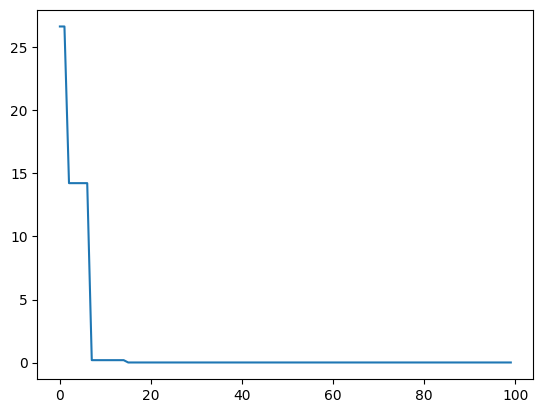

In [45]:
import matplotlib.pyplot as plt

plt.plot(Conv_curve)

plt.show()